In [6]:
from wipy.wipy_utils import utils
import numpy as np
from matplotlib import pyplot as plt
import obspy

n_events = 10
n_iters = 14

def sum_residuals(base_path, n_events) -> float: 
    """
    reads the residuals in and summs the residuals from multiple events together
    """
    resid_paths = ["/".join([base_path, "residuals", "{:06d}".format(num)]) for num in range(n_events)]

    misfit = 0
    for path in resid_paths:
        m = np.sum(np.loadtxt(path))
        misfit += m

    misfit /= n_events

    return misfit

# base_path = "/home/beneppinger/WIPY_tests/OUTPUT/residuals_0001/"



ModuleNotFoundError: No module named 'wipy.optimize.optimize_base.optimize_base'; 'wipy.optimize.optimize_base' is not a package

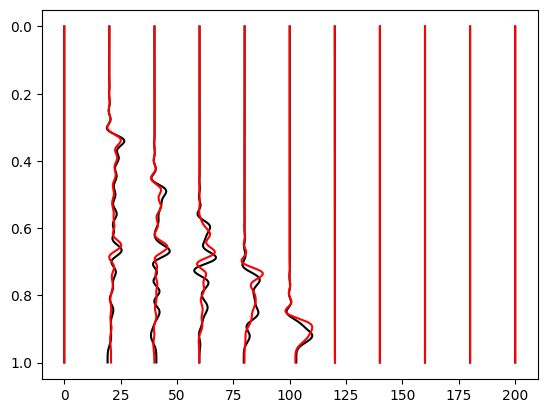

In [91]:
gather_names = "Uz_file_single_d.su_proc"

path1 = "/home/beneppinger/WIPY_tests/OUTPUT/traces_0000/traces/obs/000000/" + gather_names
path2 = "/home/beneppinger/WIPY_tests/OUTPUT/traces_0000/traces/syn/000000/" + gather_names

obs = obspy.read(path1, format="SU")
syn = obspy.read(path2, format="SU")

utils.plot_traces(obs, gain=10)
utils.plot_traces(syn, gain=10, line_spec="r-")
plt.gca().invert_yaxis()

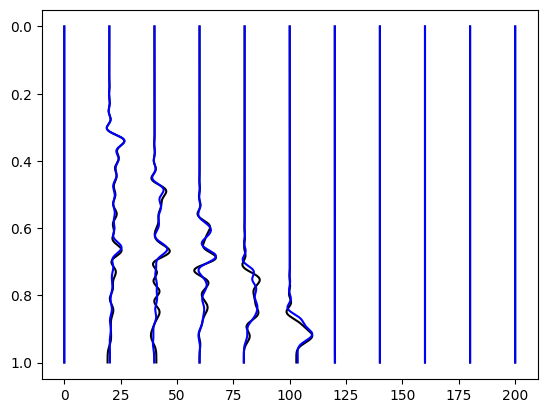

In [92]:
gather_names = "Uz_file_single_d.su_proc"

path2 = "/home/beneppinger/WIPY_tests/OUTPUT/traces_" + "{:04d}".format(n_iters) + "/traces/syn/000000/" + gather_names
path1 = "/home/beneppinger/WIPY_tests/OUTPUT/traces_" + "{:04d}".format(n_iters) + "/traces/obs/000000/" + gather_names

obs = obspy.read(path1, format="SU")
syn = obspy.read(path2, format="SU")

utils.plot_traces(obs, gain=10)
utils.plot_traces(syn, gain=10, line_spec="b-")
plt.gca().invert_yaxis()

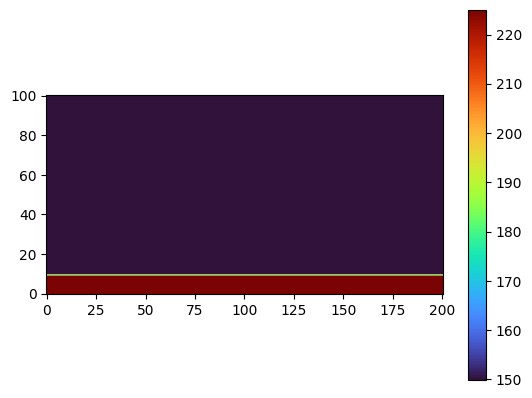

In [93]:
model_init_path = "/home/beneppinger/WIPY_tests/box_model_elastic/model_init"
pars = ["x", "z", "rho", "vp", "vs"]

model_init = utils.load_model(model_init_path, pars)

utils.plot_model_fast(model_init, 0.5, 'vs')

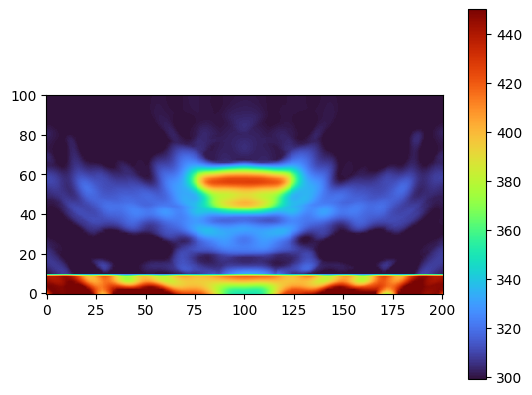

In [95]:
par = "vp"

model_final_path = "/home/beneppinger/WIPY_tests/OUTPUT/model_" + "{:04d}".format(n_iters)

model_final = utils.load_model(model_path=model_final_path, pars=[par])

model_final = model_init | model_final

utils.plot_model_fast(model_final, 0.5, par)

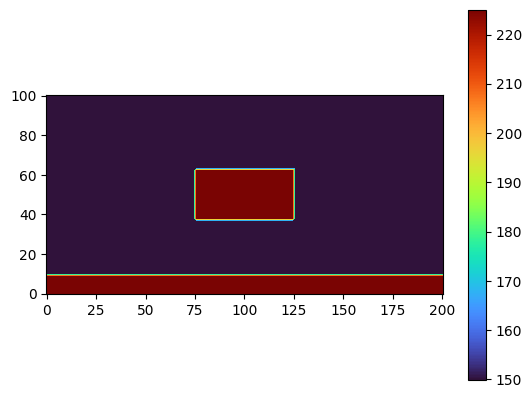

In [85]:
model_true_path = "/home/beneppinger/WIPY_tests/box_model_elastic/box_model"

model_true = utils.load_model(model_path=model_true_path, pars=pars)

utils.plot_model_fast(model_true, 0.5, 'vs')

In [86]:
misfit = []
for i in range(0, n_iters+1):
    base_path = "/home/beneppinger/WIPY_tests/OUTPUT/residuals_{:04d}/".format(i)
    misfit.append(sum_residuals(base_path, n_events))

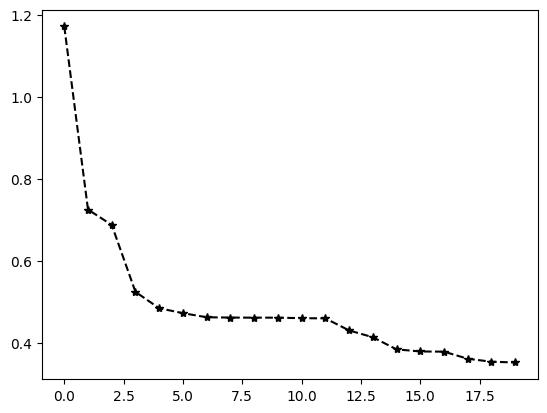

In [87]:
plt.plot(misfit, "k*--")